In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate NASDAQ-weighted portfolio returns

<img src="nasdaq_top_10.png">

## Figure 1: Top 10 components of NASDAQ by composition as at close 17 November 2021

In [2]:

# function to construct a stock prices dataframe
def construct_prices_df(tickers):
    for i, ticker in enumerate(tickers):
        if i > 0:
            stock_df = pd.read_csv('data/'+ticker+'.csv', usecols=['Date', 'Adj Close'], parse_dates=['Date'])
            stock_df = stock_df.sort_values(by='Date')
            stock_df['SimpleReturns'] = stock_df['Adj Close'].pct_change()
            stock_df.drop(columns=['Adj Close'], inplace=True)
            stock_df = stock_df.rename(columns={'SimpleReturns':str(ticker)})
            stock_df.set_index('Date', inplace=True)
            returns_df = pd.concat([returns_df, stock_df], axis=1).reindex(returns_df.index)
        elif i == 0:
            stock_df = pd.read_csv('data/'+ticker+'.csv', usecols=['Date', 'Adj Close'], parse_dates=['Date'])
            stock_df = stock_df.sort_values(by='Date')
            stock_df['SimpleReturns'] = stock_df['Adj Close'].pct_change()
            stock_df.drop(columns=['Adj Close'], inplace=True)
            stock_df = stock_df.rename(columns={'SimpleReturns':str(ticker)})
            stock_df = stock_df.rename(columns={'Adj Close':str(ticker)})
            stock_df.set_index('Date', inplace=True)
            returns_df = stock_df
    return returns_df

In [3]:
tickers_list = ['MSFT', 'AAPL', 'AMZN', 'TSLA', 'NVDA', 'GOOG', 'GOOGL', 'FB', 'ADBE', 'NFLX']
returns_df = construct_prices_df(tickers_list)
returns_df.head()

,MSFT,AAPL,AMZN,TSLA,NVDA,GOOG,GOOGL,FB,ADBE,NFLX
Date,,,,,,,,,,
2020-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-19,0.006348,0.005168,0.003722,0.025953,0.000856,0.009812,0.010301,0.003567,0.015104,0.005978
2020-11-20,-0.009557,-0.010958,-0.005653,-0.019348,-0.026227,-0.012319,-0.012618,-0.011871,-0.007483,0.007366
2020-11-23,-0.001331,-0.029743,-0.000326,0.065848,0.003992,-0.004207,-0.005080,-0.004709,-0.004990,-0.023800
2020-11-24,0.017848,0.011594,0.006349,0.064252,-0.013870,0.019610,0.021035,0.031628,0.004538,0.013134


In [4]:
returns_df.tail()

,MSFT,AAPL,AMZN,TSLA,NVDA,GOOG,GOOGL,FB,ADBE,NFLX
Date,,,,,,,,,,
2021-11-11,0.004927,-0.000338,-0.002743,-0.004157,0.031603,0.000832,-0.000871,0.000305,-0.006687,0.016494
2021-11-12,0.012905,0.014337,0.015162,-0.028293,0.000000,0.019745,0.019974,0.040123,0.022436,0.038064
2021-11-15,-0.001930,0.000067,0.005824,-0.019382,-0.012011,-0.001721,-0.001520,0.019566,0.003239,-0.004805
2021-11-16,0.010236,0.006667,-0.001405,0.040794,0.005928,-0.002089,-0.003880,-0.013235,0.017128,0.011879
2021-11-17,-0.001149,0.016490,0.002344,0.032501,-0.031189,-0.000094,0.001156,-0.006386,-0.000537,0.006241


In [5]:
# save df of stock returns for later use
returns_df.to_csv('data/nasdaq_top_10_returns.csv', index=False)

In [6]:

# calculate the weighted returns of a portfolio comprising the top 10 NASDAQ stocks
portfolio_weights = np.array([0.10822, 0.10587, 0.07606, 0.05546, 0.04874, 0.04049, 0.03777, 0.03468, 0.02063, 0.01964])
weighted_portfolio_returns = returns_df.mul(portfolio_weights, axis=1).sum(axis=1)
returns_df['Portfolio'] = weighted_portfolio_returns

In [7]:
returns_df.head()

,MSFT,AAPL,AMZN,TSLA,NVDA,GOOG,GOOGL,FB,ADBE,NFLX,Portfolio
Date,,,,,,,,,,,
2020-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2020-11-19,0.006348,0.005168,0.003722,0.025953,0.000856,0.009812,0.010301,0.003567,0.015104,0.005978,0.004337
2020-11-20,-0.009557,-0.010958,-0.005653,-0.019348,-0.026227,-0.012319,-0.012618,-0.011871,-0.007483,0.007366,-0.006372
2020-11-23,-0.001331,-0.029743,-0.000326,0.065848,0.003992,-0.004207,-0.005080,-0.004709,-0.004990,-0.023800,-0.000567
2020-11-24,0.017848,0.011594,0.006349,0.064252,-0.013870,0.019610,0.021035,0.031628,0.004538,0.013134,0.009566


# Calculate equal-weighted portfolio returns

In [8]:

# a good weighted portfolio should at least outperform an equal-weighted portfolio of the same stocks
# construct an equal-weighted portfolio of the above stocks
num_stocks = 10
equal_weights = np.repeat(1/num_stocks, num_stocks)
equal_weighted_returns = returns_df.iloc[:,0:num_stocks].mul(equal_weights, axis=1).sum(axis=1)
returns_df['EqualPortfolio'] = equal_weighted_returns

In [9]:
returns_df.head()

,MSFT,AAPL,AMZN,TSLA,NVDA,GOOG,GOOGL,FB,ADBE,NFLX,Portfolio,EqualPortfolio
Date,,,,,,,,,,,,
2020-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2020-11-19,0.006348,0.005168,0.003722,0.025953,0.000856,0.009812,0.010301,0.003567,0.015104,0.005978,0.004337,0.008681
2020-11-20,-0.009557,-0.010958,-0.005653,-0.019348,-0.026227,-0.012319,-0.012618,-0.011871,-0.007483,0.007366,-0.006372,-0.010867
2020-11-23,-0.001331,-0.029743,-0.000326,0.065848,0.003992,-0.004207,-0.005080,-0.004709,-0.004990,-0.023800,-0.000567,-0.000434
2020-11-24,0.017848,0.011594,0.006349,0.064252,-0.013870,0.019610,0.021035,0.031628,0.004538,0.013134,0.009566,0.017612


# Calculate market-cap weighted portfolio returns

<img src="mcaps.png">

## Figure 2: Top 10 NASDAQ companies by market capitalisation as at close 17 November 2021

In [10]:

# when the economy is doing well, large companies tend to dominate
# construct a portfolio weighted according to the top 10 market capitalisations of the NASDAQ
# note that this information is slighty different because NASDAQ compositions (Figure 1) are performed quarterly
# calculate the mcap weighted returns of the portfolio
market_caps = np.array([2661, 2546, 1978, 1965, 1799, 1093, 960, 731, 319, 306])
mcap_weights = market_caps/sum(market_caps)
mcap_weighted_returns = returns_df.iloc[:,0:num_stocks].mul(mcap_weights, axis=1).sum(axis=1)
returns_df['MCapPortfolio'] = mcap_weighted_returns

In [11]:
returns_df.head()

,MSFT,AAPL,AMZN,TSLA,NVDA,GOOG,GOOGL,FB,ADBE,NFLX,Portfolio,EqualPortfolio,MCapPortfolio
Date,,,,,,,,,,,,,
2020-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2020-11-19,0.006348,0.005168,0.003722,0.025953,0.000856,0.009812,0.010301,0.003567,0.015104,0.005978,0.004337,0.008681,0.008345
2020-11-20,-0.009557,-0.010958,-0.005653,-0.019348,-0.026227,-0.012319,-0.012618,-0.011871,-0.007483,0.007366,-0.006372,-0.010867,-0.012822
2020-11-23,-0.001331,-0.029743,-0.000326,0.065848,0.003992,-0.004207,-0.005080,-0.004709,-0.004990,-0.023800,-0.000567,-0.000434,0.002429
2020-11-24,0.017848,0.011594,0.006349,0.064252,-0.013870,0.019610,0.021035,0.031628,0.004538,0.013134,0.009566,0.017612,0.018184


# NASDAQ Composite returns

In [12]:
# for comparison, let's also consider broad market benchmark returns over the same period
stock_df = pd.read_csv('data/IXIC.csv', usecols=['Date', 'Adj Close'], parse_dates=['Date'])
stock_df = stock_df.sort_values(by='Date')
stock_df['SimpleReturns'] = stock_df['Adj Close'].pct_change()
stock_df.drop(columns=['Adj Close'], inplace=True)
stock_df = stock_df.rename(columns={'SimpleReturns':'NASDAQ'})
stock_df.set_index('Date', inplace=True)
returns_df = pd.concat([returns_df, stock_df], axis=1)

In [13]:
returns_df.head()

,MSFT,AAPL,AMZN,TSLA,NVDA,GOOG,GOOGL,FB,ADBE,NFLX,Portfolio,EqualPortfolio,MCapPortfolio,NASDAQ
Date,,,,,,,,,,,,,,
2020-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
2020-11-19,0.006348,0.005168,0.003722,0.025953,0.000856,0.009812,0.010301,0.003567,0.015104,0.005978,0.004337,0.008681,0.008345,0.008737
2020-11-20,-0.009557,-0.010958,-0.005653,-0.019348,-0.026227,-0.012319,-0.012618,-0.011871,-0.007483,0.007366,-0.006372,-0.010867,-0.012822,-0.004178
2020-11-23,-0.001331,-0.029743,-0.000326,0.065848,0.003992,-0.004207,-0.005080,-0.004709,-0.004990,-0.023800,-0.000567,-0.000434,0.002429,0.002165
2020-11-24,0.017848,0.011594,0.006349,0.064252,-0.013870,0.019610,0.021035,0.031628,0.004538,0.013134,0.009566,0.017612,0.018184,0.013144


# Plot and compare portfolio returns

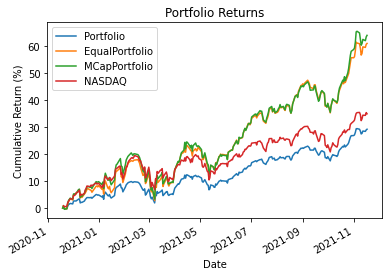

In [14]:

# construct a cumulative returns df, and plot
cum_returns_df = ((1+returns_df).cumprod() - 1) * 100
cum_returns_df[['Portfolio', 'EqualPortfolio', 'MCapPortfolio', 'NASDAQ']].plot()
plt.title('Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.show()